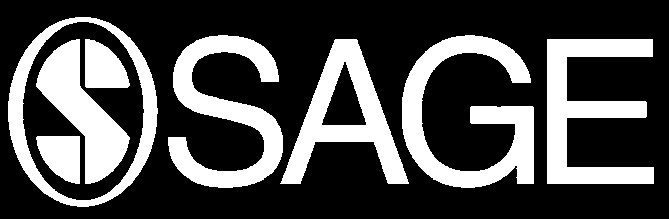

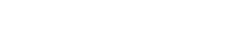

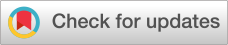

In [1]:
import fitz  # PyMuPDF
import re
import os
from IPython.display import display, Image

def extract_and_display_figures(pdf_path):
    doc = fitz.open(pdf_path)
    figures = []  # To store metadata if needed for further analysis

    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text = page.get_text()
        images = page.get_images(full=True)
        
        for img_index, img in enumerate(images):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image_name = f"fig_{page_num+1}_{img_index}.{image_ext}"
            
            # Store figure metadata or additional info as needed
            figures.append((text, image_name))
            
            # Display the image using IPython.display
            display(Image(data=image_bytes))
    
    return figures


pdf_path = '../pdfs/Barker Caza et al._2018_ASQ_From Synchronizing to Harmonizing - The Process of Authenticating Multiple Work Identities.pdf'
figures = extract_and_display_figures(pdf_path)


In [2]:
# import fitz  # PyMuPDF
# from PIL import Image
# import io
# def render_pdf_pages(pdf_path):
#     doc = fitz.open(pdf_path)
#     for page in doc:
#         # Render page to an image (pix)
#         pix = page.get_pixmap(matrix=fitz.Matrix(300 / 72, 300 / 72))  # increase resolution
#         img_bytes = pix.tobytes("ppm")
#         yield Image.open(io.BytesIO(img_bytes))

# # Example usage
# # pdf_path = 'path_to_pdf.pdf'
# for image in render_pdf_pages(pdf_path):
#     display(image)

In [2]:
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import io

def extract_figures_with_ocr(pdf_path):
    doc = fitz.open(pdf_path)
    
    for page_num, page in enumerate(doc):
    # if page_num == 27:
        # Increase DPI of the image
        zoom_x = 2.0  # horizontal zoom
        zoom_y = 2.0  # vertical zoom
        mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension

        # Render the page into an image using the zoom matrix
        pix = page.get_pixmap(matrix=mat)

        # Open the image with PIL
        img = Image.open(io.BytesIO(pix.tobytes("ppm")))

        # Rotate the image 90 degrees clockwise
        img = img.rotate(-90, expand=True)  # Use expand=True to resize the image to fit the new orientation

        # Use OCR to extract text
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(img, config=custom_config)

        # # Optional: Output text for a specific page
        # if page_num == 27:
        #     print("hi")
        #     print(text)
        #     img.save(f"Figure_Page_{page_num+1}.png")

        # Check if 'Figure 1.' or 'Figure 2.' is in the OCR'd text
        if 'Figure 1.' in text or 'Figure 2.' in text or 'Figure 1:' in text or 'Figure 2:' in text:
            # Save the rotated page as an image
            img.save(f"Figure_Page_{page_num+1}_1.png")
            print(f"Saved Figure_Page_{page_num+1}_1.png")

# Usage
# pdf_path = 'path_to_pdf.pdf'
extract_figures_with_ocr(pdf_path)


Saved Figure_Page_28_1.png


KeyboardInterrupt: 